## Project Name - **Avocado Project**


##### Name - Aman Mulla.
##### Batch - DS2307



# **Project Summary -**

**The provided dataset, sourced from the Hass Avocado Board in 2018, details weekly retail scan data for Hass avocados across various retail channels. Spanning from 2013, it encompasses data from multiple outlets like grocery, mass, club, drug, dollar, and military stores. The dataset tracks National retail volume (in units) and average price per avocado, derived directly from cash register sales. Notably, it focuses solely on Hass avocados, excluding other avocado varieties. The Average Price represents a per-unit cost, even for multi-avocado sales in bags. This rich dataset enables analysis of consumption trends, pricing dynamics, and retail volume fluctuations for Hass avocados throughout 2018, offering insights into consumer preferences and market behavior within the broader retail landscape.**


We have below feature for glass,

1. **Date** - The date of the observation
2. **Average Price** - the average price of a single avocado
3. **Type** - conventional or organic
4. **Year** - the year
5. **Region** - the city or region of the observation
6. **Total Volume** - Total number of avocados sold
7. **4046** - Total number of avocados with PLU 4046 sold
8. **4225** - Total number of avocados with PLU 4225 sold
9. **4770** - Total number of avocados with PLU 4770 sold


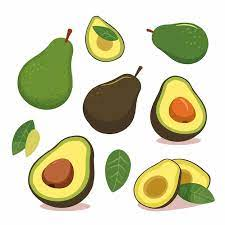

# **Problem Statement**

**The problem involves utilizing a dataset from the Hass Avocado Board, focusing on classification to predict regions based on avocado sales data and regression to forecast avocado prices. The aim is to create a model that classifies regions and predicts avocado prices.**


In [ ]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [ ]:
avocado = pd.read_csv('/content/drive/MyDrive/DataSets/avocado.csv')

avocado.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


From above .head() we can observe that we have one column with name "Unnamed:0" which dont have any meaning in dataset, will drop this from dataset.


In [ ]:
avocado.drop(columns='Unnamed: 0',inplace=True)


In [ ]:
avocado.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# Will Check for shape of dataset

avocado.shape

(18249, 13)

**We have total 18249 rows and 13 column in our detaset. To avoide type error will rename for some of column name.**

In [ ]:
avocado.rename(columns={'Total Volume':'Total_Volume','4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770',
                        'Total Bags':'Total_Bags','Small Bags':'Small_Bags','Large Bags':'Large_Bags',
                        'XLarge Bags':'XLarge_Bags'},inplace=True)

In [ ]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total_Volume  18249 non-null  float64
 3   PLU_4046      18249 non-null  float64
 4   PLU_4225      18249 non-null  float64
 5   PLU_4770      18249 non-null  float64
 6   Total_Bags    18249 non-null  float64
 7   Small_Bags    18249 non-null  float64
 8   Large_Bags    18249 non-null  float64
 9   XLarge_Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


From .info(), we can observe that there were varaibles with datatype of object,float and int only.

In [ ]:
# Will check for description of dataset

avocado.describe()

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


From .describe() we can get count, mean, minimum value, maximum values ans quirtile value for each numerical column.

In [ ]:
# will check for null values in dataset

avocado.isnull().sum()

Date            0
AveragePrice    0
Total_Volume    0
PLU_4046        0
PLU_4225        0
PLU_4770        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: >

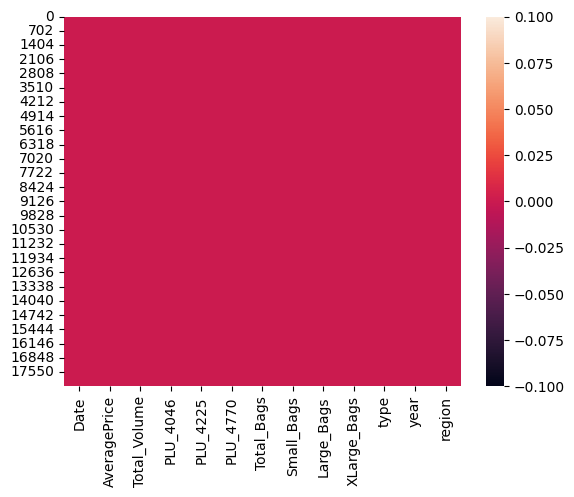

In [ ]:
sns.heatmap(avocado.isnull())

In [ ]:
avocado['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

#### Chart - 1

### **Avocado Sales Across Regions**

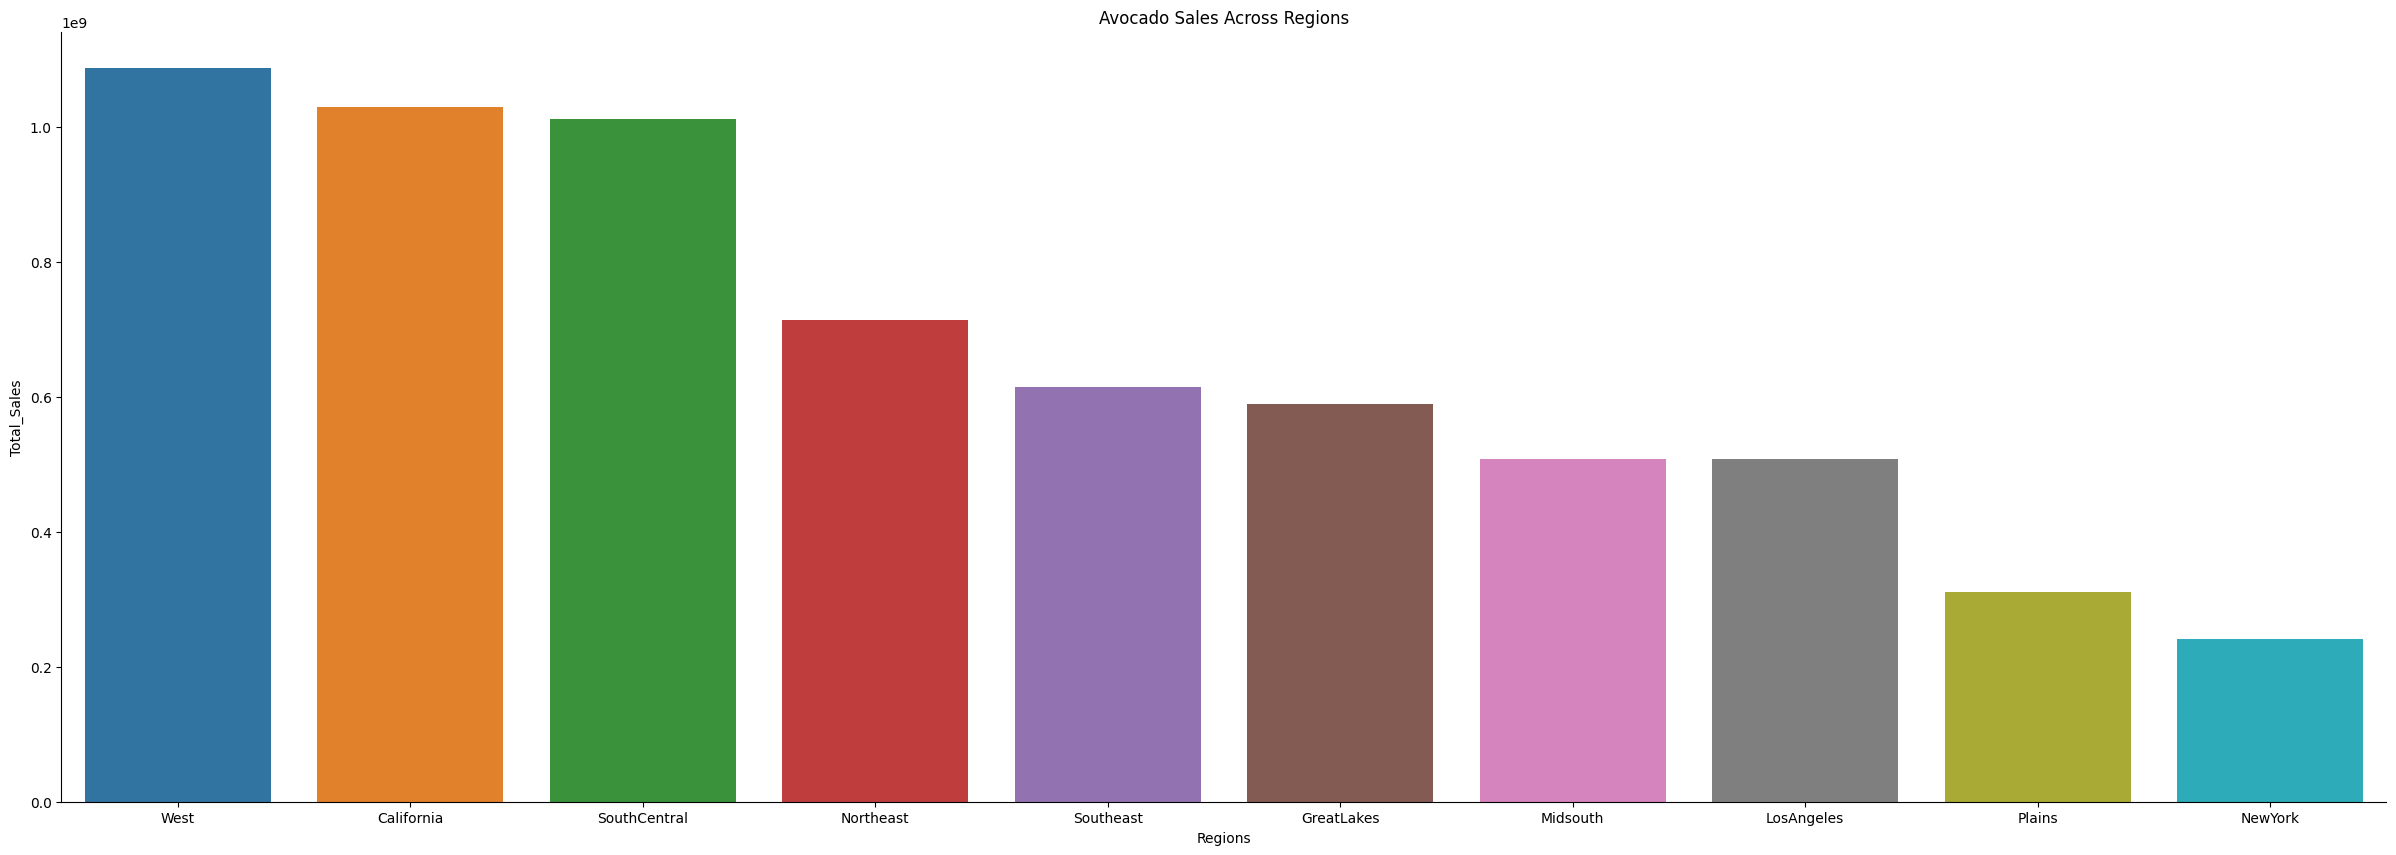

In [ ]:
sales_region = avocado[avocado['region'] !='TotalUS']

exact_sales_region = sales_region.groupby('region')['Total_Volume'].sum()

pd.options.display.float_format = '{:.2f}'.format

sorted_sales_region = exact_sales_region.sort_values(ascending =False).head(10)

sorted_sales_region

f,ax = plt.subplots(figsize=(30,10))
sns.despine(f)
sns.barplot(data=avocado,x=sorted_sales_region.index,y=sorted_sales_region.values)
plt.xlabel('Regions')
plt.ylabel('Total_Sales')
plt.title('Avocado Sales Across Regions')
plt.show()

**Insights from above chart:**


*   'West' region have highest sales volumn followed by 'California' and 'SouthCentral' region. While in Top 10 region 'Newyork' is at 10th position.
*   The West and California regions in the United States might have the highest avocado total sales due to several reasons:
     1. California's climate is conducive to avocado cultivation. Avocados thrive in moderate, subtropical climates, and California offers suitable conditions for large-scale avocado production.
     2. The West region, including California, benefits from similar climate advantages, supporting local production and availability.
     3. California is a primary avocado-producing region in the U.S., with many avocado farms concentrated in this area.
     4. West Coast regions like California often have a higher demand for healthier food options, including avocados. Avocados are popular for their nutritional value and versatile use in various dishes, aligning with health-conscious eating trends prevalent in these areas.

*   Several factors could contribute to lower avocado sales in regions like New York and the Plains:
     1. The Plains, for instance, might have a colder climate that historically hasn't favored avocado consumption.
     2. Accessibility and distribution networks can influence avocado availability. Regions with less efficient distribution channels might have lower availability or higher prices for avocados, affecting sales.



#### Chart - 2

### **Avocado Sales Across Years**

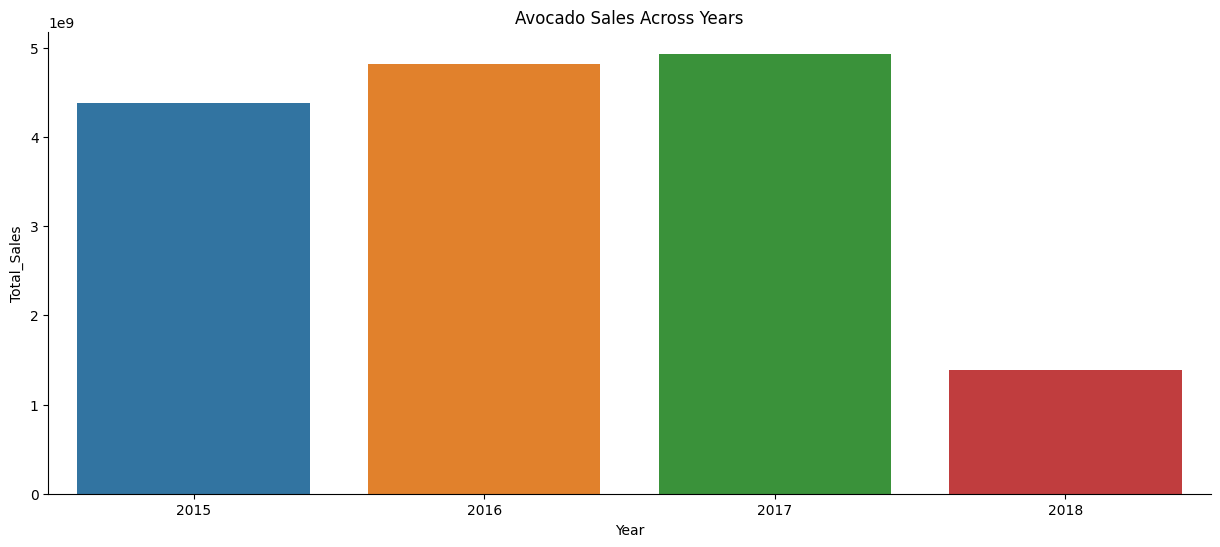

In [ ]:
sales_year = avocado.groupby('year')['Total_Volume'].sum()
sales_year

f,ax = plt.subplots(figsize=(15,6))
sns.despine(f)

sns.barplot(data=avocado,x=sales_year.index,y=sales_year.values,orient="v")
plt.xlabel('Year')
plt.ylabel('Total_Sales')
plt.title('Avocado Sales Across Years')
plt.show()

**Insights from above chart:**

*  It illustrates the annual sales performance of avocados, allowing for the identification of trends over time.
*  2017 had highest sales while 2018 had very less sales. It seems like in 2018 there was drastic change in sales of avocado, possible reason could be as follow:
    1. 2018 saw a notable increase in avocado prices due to factors like increased global demand, labor strikes in producing regions, and decreased harvests.
    2. Weather-related disruptions or other issues in major avocado-producing regions might have led to reduced supplies. Shortages could have limited availability, causing a drop in sales.
    3. Shifts in marketing strategies or reduced promotional activities focusing on avocados during 2018 might have impacted consumer awareness and demand for avocados.



#### Chart - 3

### **Avocado Sales by Type (Conventional/Organic)**

In [ ]:
avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

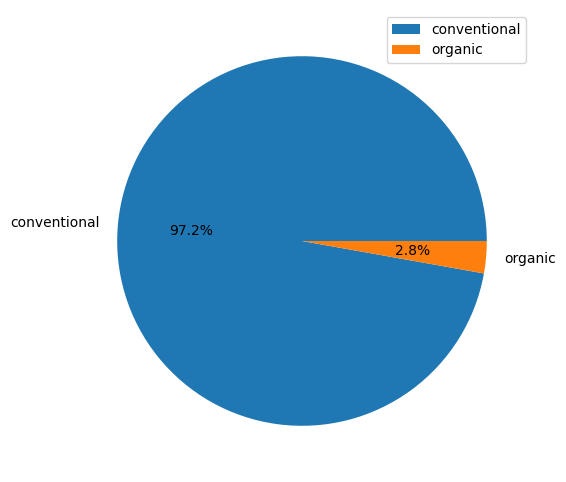

In [ ]:
type_sales = avocado.groupby('type')['Total_Volume'].sum()

type_sales

f,ax = plt.subplots(figsize=(15,6))
sns.despine(f)
plt.pie(x=type_sales.values,labels=type_sales.index,autopct='%1.1f%%')
plt.legend()
ax.legend()
plt.show()

**Insights from above chart:**

*  From above pieplot we can clearly observe that conventional type avocado have total 97.2% sales while organic type avocado have very less (2.8%) sales.Possible reason could be:

   1.  Conventional avocados are often cheaper than organic ones due to differences in farming practices, certifications, and production costs. The lower price of conventional avocados makes them more accessible to a larger segment of consumers.
   2. Conventional avocados often have a more extensive supply and are available in greater quantities and varieties compared to organic avocados. This increased availability and variety make conventional avocados more accessible in various stores and regions.
   3. The majority of consumers might not prioritize organic certification when purchasing avocados. Hence, the higher demand for conventional avocados compared to organic ones could be due to the preferences of the broader consumer base.
   4.  Retailers might prioritize stocking conventional avocados due to higher demand, leading to more prominent placement and marketing efforts for these products. This increased visibility and accessibility might contribute to higher sales.

#### Chart - 4

### **Breakdown of Small, Large, and XLarge Bags in Avocado Sales**

<Axes: xlabel='Total_Volume', ylabel='XLarge_Bags'>

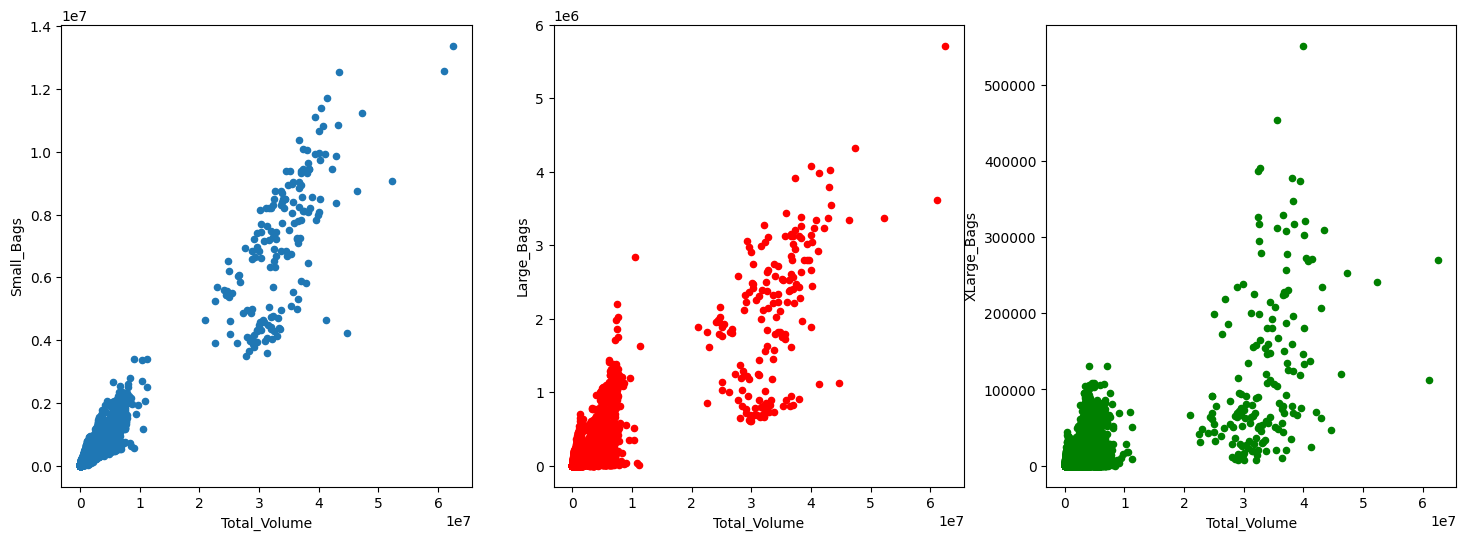

In [ ]:
fig,axs = plt.subplots(1,3)

avocado.plot(kind='scatter',x='Total_Volume',y='Small_Bags',ax=axs[0],figsize=(18,6))

avocado.plot(kind='scatter',x='Total_Volume',y='Large_Bags',ax=axs[1],figsize=(18,6), color='red')

avocado.plot(kind='scatter',x='Total_Volume',y='XLarge_Bags',ax=axs[2],figsize=(18,6),color='green')

**Insights from above chart:**

* The scatter plots showcase the distribution of different bag sizes concerning the total avocado sales volume.
* The distribution of points can help identify correlations between bag sizes and total sales volume.
* Small_bags show a linear increase with higher total volume, it indicates a positive correlation.
* XLarge_Bags have fewer points but a more significant spread concerning total volume, it might signify a higher impact on sales when those bags are purchased.
* Each bag size concerning total volume to understand how the sales composition varies across different bag sizes concerning the total sales volume.



#### Chart - 5

### **Distribution of 'PLU_4046', 'PLU_4225','PLU_4770' Avocado Sales**

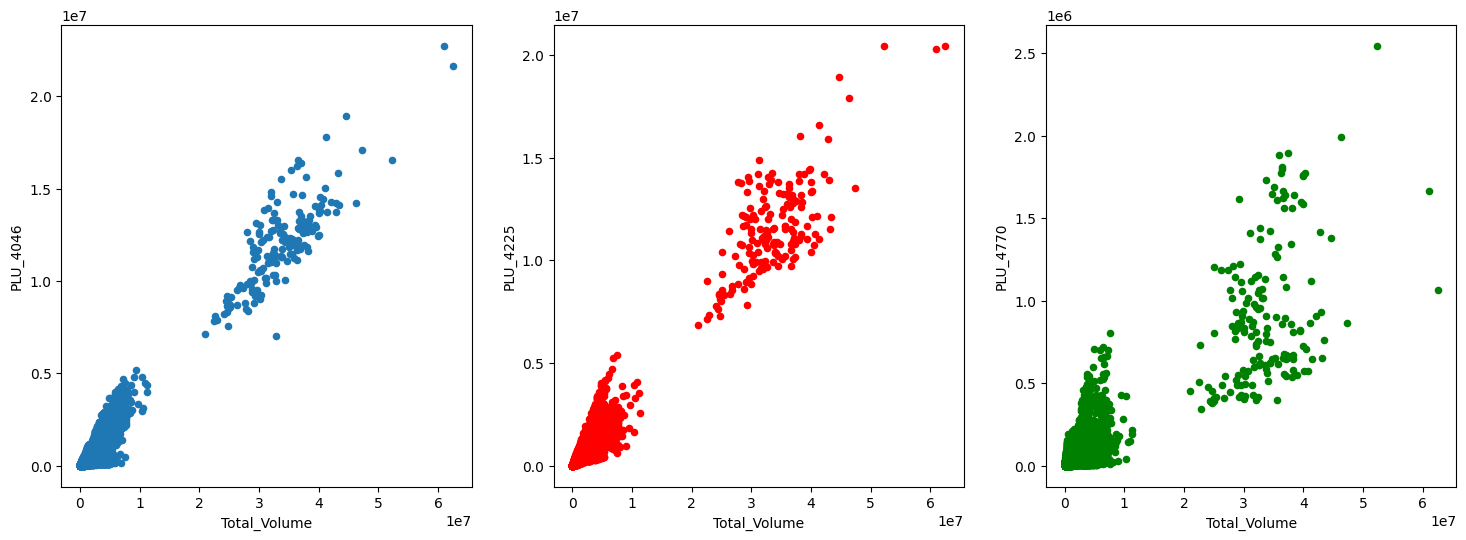

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

avocado.plot(kind='scatter', y='PLU_4046', x='Total_Volume', ax=axs[0])
avocado.plot(kind='scatter', y='PLU_4225', x='Total_Volume', ax=axs[1], color='red')
avocado.plot(kind='scatter', y='PLU_4770', x='Total_Volume', ax=axs[2], color='green')

plt.show()

**Insights from above chart:**

* The scatter plots display how the volumes of PLU_4046, PLU_4225, and PLU_4770 avocados vary concerning total sales volume:
    1. PLU_4225 consistently increases concerning total volume, it implies a potential correlation between that avocado type and sales volume.

#### Chart - 6

### **Pairplot**

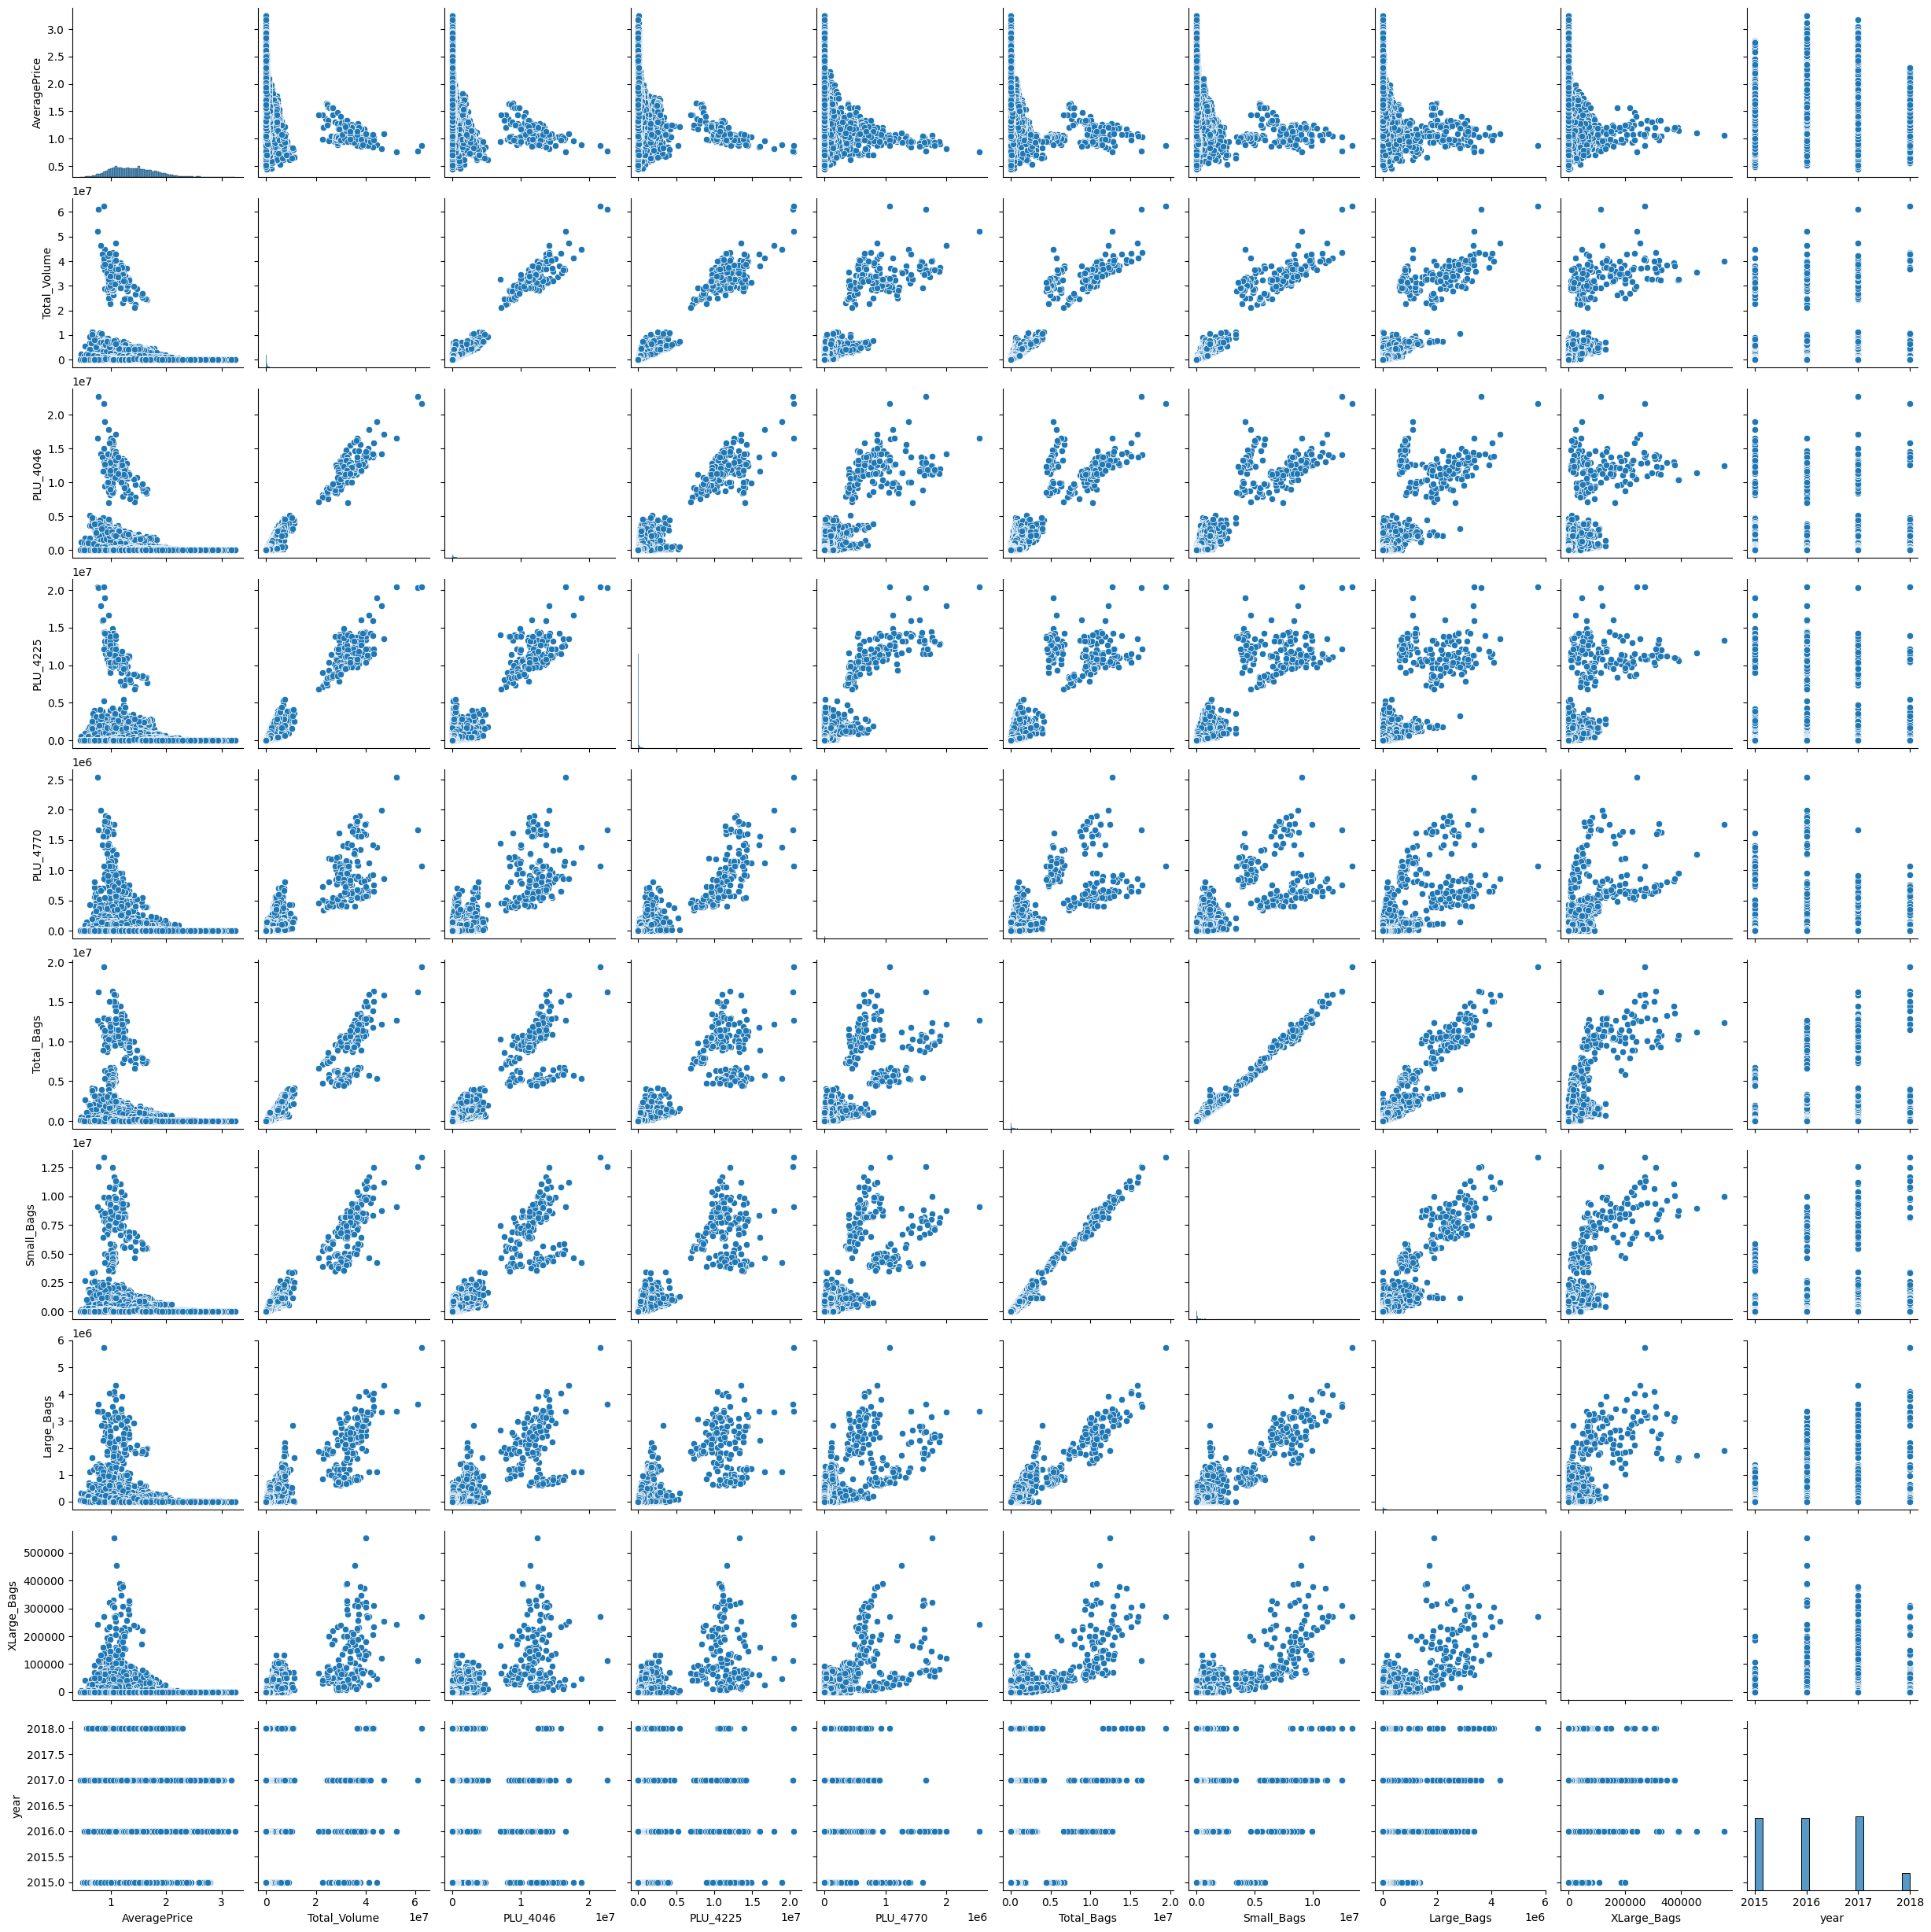

In [18]:
sns.pairplot(avocado)

#### Chart - 7

### **Heatmap**

<ipython-input-19-0e65d555dfd6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_data.corr()


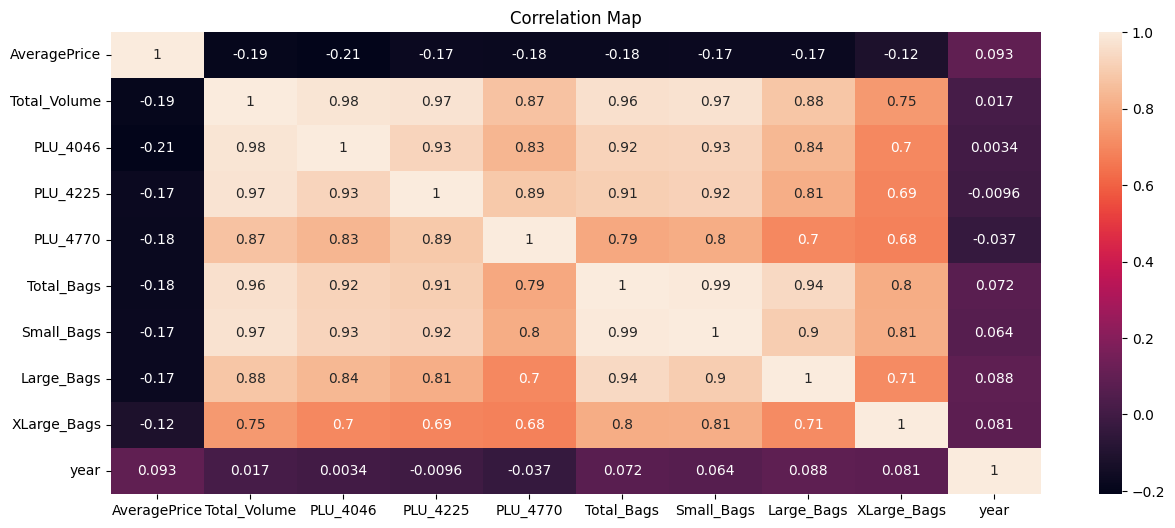

In [19]:
correlation_data = avocado

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(15,6))

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Map')
plt.show()

## **As per Problem statementwe are implimenting classification as well as regression model. Firstly will go with classification.**

### Before implementing for ML Model will encode column.

In [20]:
avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

### Verifying and Analyzing above regions to avoide or to get clear idea about region will devide or categorize region column in 'Geographical Regions' and 'Market Regions'. So in categories regions will have below regions,

**geographical_regions** = ['Northeast', 'Southeast', 'West', 'SouthCentral', 'Plains', 'Midsouth', 'GreatLakes']

**market_regions** = ['Albany', 'Atlanta', 'BaltimoreWashington', 'California', 'DallasFtWorth', 'Houston', 'MiamiFtLauderdale', 'NewYork', 'LosAngeles', 'Philadelphia']

In [21]:
# Define the conditions for categorization
geographical_regions = ['Northeast', 'Southeast', 'West', 'SouthCentral', 'Plains', 'Midsouth', 'GreatLakes']
market_regions = ['Albany', 'Atlanta', 'BaltimoreWashington', 'California', 'DallasFtWorth', 'Houston', 'MiamiFtLauderdale', 'NewYork', 'LosAngeles', 'Philadelphia']

# Create a single column 'Categorized_region' combining both categories
avocado['Categorized_region'] = np.where(avocado['region'].isin(geographical_regions), 'Geographical_Regions',
                                np.where(avocado['region'].isin(market_regions), 'Market_Regions', 'Other'))

In [22]:
avocado['Categorized_region'].unique()

array(['Market_Regions', 'Other', 'Geographical_Regions'], dtype=object)

In [23]:
# For type column we have 2 unique entries,will encode as conventional=0,organic=1

type_encoding = {"type":{"conventional":0,"organic":1}}

type_encoding

avocado = avocado.replace(type_encoding)

# For Categorized_region we have 3 unique entries, will encode as geographical_regions = 1, market_regions=2, other=3

Categorized_region_encoding ={"Categorized_region":{"Geographical_Regions":1,"Market_Regions":2,"Other":0}}

Categorized_region_encoding

avocado = avocado.replace(Categorized_region_encoding)

In [24]:
avocado.head()

,Date,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Categorized_region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,Albany,2
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,Albany,2
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,Albany,2
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,Albany,2
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,Albany,2


In [25]:
avocado['Categorized_region'].unique()

array([2, 0, 1])

In [26]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total_Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags',
       'type', 'year', 'region', 'Categorized_region'],
      dtype='object')

## **ML Model Implementation**

### ML Model - 1

#### Linear regression

In [27]:
# Importing Necessary Libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [28]:
# For ML Model 1 Using all variables from dataset, putting selected featurs.

x = avocado[['AveragePrice', 'Total_Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags',
       'type']]

y = avocado['Categorized_region']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train,y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For ML Model 1:", accuracy)
print("Confusion Matrix For ML Model 1:\n", confusion)
print("Classification Report for ML Model 1:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For ML Model 1(with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For ML Model 1(with Hyperparameter Tuning):\n", confusion)
print("Classification Report for ML Model 1(with Hyperparameter Tuning):\n", classification_report_str)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy For ML Model 1: 0.6841989918912996
Confusion Matrix For ML Model 1:
 [[3120   38    0]
 [ 564    0    0]
 [ 839    0    2]]
Classification Report for ML Model 1:
               precision    recall  f1-score   support

           0       0.69      0.99      0.81      3158
           1       0.00      0.00      0.00       564
           2       1.00      0.00      0.00       841

    accuracy                           0.68      4563
   macro avg       0.56      0.33      0.27      4563
weighted avg       0.66      0.68      0.56      4563



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Model: LogisticRegression(C=100)
Accuracy For ML Model 1(with Hyperparameter Tuning): 0.695375849222003
Confusion Matrix For ML Model 1(with Hyperparameter Tuning):
 [[3125   31    2]
 [ 547    4   13]
 [ 797    0   44]]
Classification Report for ML Model 1(with Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       0.70      0.99      0.82      3158
           1       0.11      0.01      0.01       564
           2       0.75      0.05      0.10       841

    accuracy                           0.70      4563
   macro avg       0.52      0.35      0.31      4563
weighted avg       0.64      0.70      0.59      4563



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Insights from ML Model 1:**

* Before Tuning:

  **Accuracy: 68.42%**

  Class 0 (0): Precision = 0.69, Recall = 0.99, F1-Score = 0.81

  Class 1 (1): Precision = 0.00, Recall = 0.00, F1-Score = 0.00

  Class 2 (2): Precision = 1.00, Recall = 0.00, F1-Score = 0.00

* After Tuning:

  **Accuracy: 69.54%**

 Class 0 (0): Precision = 0.70, Recall = 0.99, F1-Score = 0.82

 Class 1 (1): Precision = 0.11, Recall = 0.01, F1-Score = 0.01

 Class 2 (2): Precision = 0.75, Recall = 0.05, F1-Score = 0.10


* There's a slight increase in accuracy after tuning, which indicates a small overall improvement in the model's predictive performance.
* The model's performance, while slightly enhanced after tuning (notably in class 0), still faces significant challenges in correctly predicting classes 1 and 2.Precision, recall, and F1-Score for classes 1 and 2 are considerably low, indicating that the model's ability to identify these classes is poor.


### ML Model - 2

#### Using Selected columns

In [ ]:
# For ML Model 1 Using all variables from dataset, putting selected featurs.

x = avocado[['AveragePrice', 'Total_Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770','type']]

y = avocado['Categorized_region']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train,y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For ML Model 1:", accuracy)
print("Confusion Matrix For ML Model 1:\n", confusion)
print("Classification Report for ML Model 1:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For ML Model 1(with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For ML Model 1(with Hyperparameter Tuning):\n", confusion)
print("Classification Report for ML Model 1(with Hyperparameter Tuning):\n", classification_report_str)

**Insights from ML Model 2:**

* Before Tuning:

  **Accuracy: 0.683 (68.3%)**

  Confusion Matrix:

  Class 0: 3117 correct predictions, 41 false predictions
  Class 1: 0 correct predictions, 564 false predictions
  Class 2: 0 correct predictions, 841 false predictions

  Precision, Recall, F1-score:

  Class 0: Precision 0.69, Recall 0.99, F1-score 0.81
  Class 1: Precision 0.00, Recall 0.00, F1-score 0.00
  Class 2: Precision 0.00, Recall 0.00, F1-score 0.00

* After Tuning:

  **Accuracy: 0.692 (69.2%)**

  Confusion Matrix:

  Class 0: 3158 correct predictions, 0 false predictions
  Class 1: 0 correct predictions, 564 false predictions
  Class 2: 0 correct predictions, 841 false predictions

  Precision, Recall, F1-score:

  Class 0: Precision 0.69, Recall 1.00, F1-score 0.82
  Class 1: Precision 0.00, Recall 0.00, F1-score 0.00
 Class 2: Precision 0.00, Recall 0.00, F1-score 0.00

### ML Model - 3

#### Decision Tree Model

In [ ]:
# Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# For ML Model 3, using selected variable from previous model which gives more accuracy.

x = avocado[['AveragePrice', 'Total_Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770','type']]

y = avocado['Categorized_region']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For Decision Tree Model:", accuracy)
print("Confusion Matrix Decision Tree Model:\n", confusion)
print("Classification Report Decision Tree Model:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid

param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For Decision Tree Model (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For Decision Tree Model (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for Decision Tree Model (with Hyperparameter Tuning):\n", classification_report_str)

**Insights from Decision Tree Model:**

* Before Tuning:

  **Accuracy: 0.867 (86.7%)**

  Confusion Matrix:
The model correctly predicted class 0 reasonably well but had some confusion between classes 1 and 2.

  Precision, Recall, F1-score: Class 0 had high precision, recall, and F1-score.
  Class 1 showed good precision and recall, while class 2 had lower precision and recall.

* After Tuning:

  **Accuracy: 0.765 (76.5%)**

  Confusion Matrix: There's a decrease in accuracy after tuning, and the model now misclassifies more instances.

 Precision, Recall, F1-score: Class 0 still maintains decent precision and recall.
Class 1 has decreased precision but improved recall.
Class 2 has notably lower precision, recall, and F1-score.

### ML Model - 4

#### RandomForestClassifier

In [ ]:
# Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# For ML Model RandomForestClassifier, using selected variable from previous model which gives more accuracy.

x = avocado[['AveragePrice', 'Total_Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770','type']]

y = avocado['Categorized_region']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting RandomForest model, first will import from sklearn package

from sklearn.ensemble import RandomForestClassifier

random_for = RandomForestClassifier()

random_for.fit(x_train,y_train)

# Make predictions on the test set
y_pred = random_for.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For RandomForestClassifier:", accuracy)
print("Confusion Matrix RandomForestClassifier:\n", confusion)
print("Classification Report RandomForestClassifier:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid

param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_for, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For RandomForestClassifier (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For RandomForestClassifier (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for RandomForestClassifier (with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For RandomForestClassifier: 0.9149682226605304
Confusion Matrix RandomForestClassifier:
 [[3029    7  122]
 [   2  547   15]
 [ 192   50  599]]
Classification Report RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3158
           1       0.91      0.97      0.94       564
           2       0.81      0.71      0.76       841

    accuracy                           0.91      4563
   macro avg       0.89      0.88      0.88      4563
weighted avg       0.91      0.91      0.91      4563



**Insights from RandomForest Classifier Model:**

*  Before Tuning:

   Accuracy: 0.913 (91.3%)

   Confusion Matrix: The model performed well across all classes, with relatively accurate predictions for each class.

   Most misclassifications occurred between classes 0 and 2.

   Precision, Recall, F1-score: Class 0 had high precision, recall, and F1-score, indicating excellent performance. Class 1 also had good precision, recall, and F1-score, though slightly lower than class 0. Class 2 had lower precision, recall, and F1-score, indicating the model struggled more with this class.

*  After Tuning:

   Accuracy: 0.791 (79.1%)

   Confusion Matrix: There's a notable decrease in overall accuracy after tuning. Misclassifications increased across all classes compared to before tuning.

  Precision, Recall, F1-score: Class 0 maintained relatively high precision and recall but showed a slight decrease. Class 1 precision dropped while recall increased. The F1-score remained lower than before tuning. Class 2 precision, recall, and F1-score decreased significantly, indicating poorer performance.


**The initial RandomForestClassifier model performed better across all classes compared to the tuned model.**

### ML Model - 5

#### KNeighborsClassifier

In [ ]:
# Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# For ML Model 7,Using all KNeighborsClassifier

x = avocado[['AveragePrice', 'Total_Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770','type']]

y = avocado['Categorized_region']


# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting KNeighborsClassifier model, first will import from sklearn package

from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier()

kNN.fit(x_train,y_train)

# Make predictions on the test set
y_pred = kNN.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For KNeighborsClassifier:", accuracy)
print("Confusion Matrix for KNeighborsClassifier:\n", confusion)
print("Classification Report for KNeighborsClassifier:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid

param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=kNN, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For KNeighborsClassifier (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For KNeighborsClassifier (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for KNeighborsClassifier (with Hyperparameter Tuning):\n", classification_report_str)

**Insights from kNN Model:**

* Before Tuning:

  Accuracy: 83.1%

  Confusion Matrix: Predicted class 0 fairly accurately (2939 out of 3158).
Struggled a bit with classifying instances into classes 1 and 2.

  Precision, Recall, F1-score: Class 0 has the highest precision, recall, and F1-score. Class 2 has the lowest precision, recall, and F1-score.

* After Tuning:

  Accuracy: 84.5%

  Confusion Matrix: Improved predictions for class 0 (2910 out of 3158) and slightly better performance for classes 1 and 2.

  Precision, Recall, F1-score: Generally improved across all classes compared to before tuning. Class 2 still has the lowest precision, recall, and F1-score, but there's an improvement.

**The model's performance has shown improvement after hyperparameter tuning.The improvements across precision, recall, and F1-score, along with the increased accuracy, suggest a better overall performance of the model after tuning compared to its initial state.**

# **Conclusion:**

**Overall, the KNeighborsClassifier demonstrates better performance compared to Logistic Regression, considering accuracy and improvements in predictive metrics. Before tuning, KNeighborsClassifier had a higher accuracy (83.1% vs. 68.3%) and after tuning, it maintained its lead (84.5% vs. 69.2%). KNeighborsClassifier also showed more consistent improvements across precision, recall, and F1-scores, albeit with class 2 still needing improvement.**


# Will save tha model with name "Avocado_best_Model"

In [ ]:
import pickle

# Save the model to a file
with open('Avocado_best_Model.pkl', 'wb') as file:
    pickle.dump(kNN, file)

In [ ]:
## Load the saved model from file
with open('Avocado_best_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Regression Models



In [ ]:
# Importing Libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
import math